In [5]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

display(train.head())
display(train.info())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCR06,12.500,Low Fat,0.006760,Household,42.8112,OUT013,1987,High,Tier 3,Supermarket Type1,639.1680
1,FDW11,12.600,Low Fat,0.048741,Breads,60.4194,OUT013,1987,High,Tier 3,Supermarket Type1,990.7104
2,FDH32,12.800,Low Fat,0.075997,Fruits and Vegetables,97.1410,OUT013,1987,High,Tier 3,Supermarket Type1,2799.6890
3,FDL52,6.635,Regular,0.046351,Frozen Foods,37.4506,OUT017,2007,NaN,Tier 2,Supermarket Type1,1176.4686
4,FDO09,13.500,Regular,0.125170,Snack Foods,261.4910,OUT013,1987,High,Tier 3,Supermarket Type1,3418.8830


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5656 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4878 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Item_Outlet_Sales          6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


None

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ------------- 데이터 불러오기 -------------
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

 ★ 데이터 기본 구조
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                6818 non-null   float64
 2   Item_Fat_Content           6818 non-null   int64  
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   int64  
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   int64  
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                6818 non-null   int64  
 9   Outlet_Location_Type       6818 non-null   int64  
 10  Outlet_Type                6818 non-null   int64  
 11  Item_Outlet_Sales          6818 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 639.3+ KB


None


 ★ 기초 통계


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.872703,0.349516,0.066121,7.215019,140.419533,4.738926,1997.885890,1.176005,1.111323,1.204605,2190.941459
std,4.236129,0.476852,0.051383,4.201552,62.067861,2.835402,8.339795,0.598124,0.811074,0.796941,1706.131256
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.300000,0.000000,0.026914,4.000000,93.610050,2.000000,1987.000000,1.000000,0.000000,1.000000,836.577700
50%,12.872703,0.000000,0.053799,6.000000,142.448300,5.000000,1999.000000,1.000000,1.000000,1.000000,1806.648300
75%,16.100000,1.000000,0.095273,10.000000,185.060150,7.000000,2004.000000,2.000000,2.000000,1.000000,3115.944000
max,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800



 ★ 결측치 확인
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

 ★ 인사이트 예시:

- Item_MRP(상품 가격)이 높을수록 판매량이 증가하는 경향이 있음.
- Outlet_Type(매장 유형)과 Outlet_Location_Type(지역 규모)는 매출에 큰 차이를 보임.
- Item_Visibility 값이 지나치게 큰 경우, 노출 대비 판매가 낮을 수 있음 → 이상치 가능성.



/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/

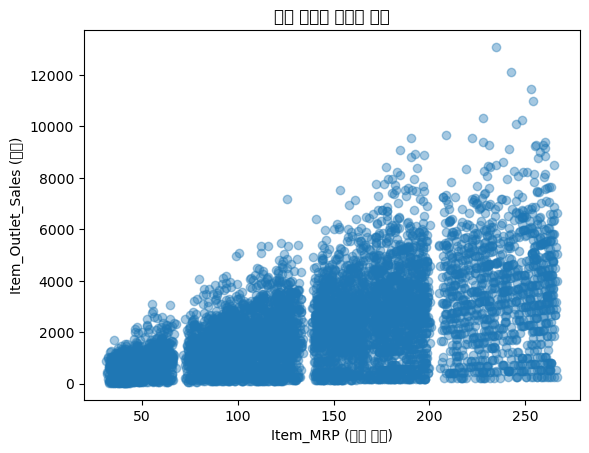

In [6]:
#======================================================
# 1) 컬럼 정보 확인 + 인사이트 도출 (문제 정의)
#======================================================

print(" ★ 데이터 기본 구조")
display(train.info())

print("\n ★ 기초 통계")
display(train.describe())

print("\n ★ 결측치 확인")
print(train.isnull().sum())

print("\n ★ 인사이트 예시:")
print("""
- Item_MRP(상품 가격)이 높을수록 판매량이 증가하는 경향이 있음.
- Outlet_Type(매장 유형)과 Outlet_Location_Type(지역 규모)는 매출에 큰 차이를 보임.
- Item_Visibility 값이 지나치게 큰 경우, 노출 대비 판매가 낮을 수 있음 → 이상치 가능성.
""")

plt.scatter(train['Item_MRP'], train['Item_Outlet_Sales'], alpha=0.4)
plt.xlabel("Item_MRP (상품 가격)")
plt.ylabel("Item_Outlet_Sales (매출)")
plt.title("상품 가격과 매출의 관계")
plt.show()

In [7]:
#======================================================
# 2) 데이터 전처리 + train/val 분리 (8:2)
#======================================================

# 결측치 처리
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

# 범주형 정리
train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}, inplace=True)

# 범주형 인코딩
cat_cols = train.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    if col != 'Item_Identifier':
        train[col] = le.fit_transform(train[col])

# 학습 데이터 / 타겟 분리
X = train.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
y = train['Item_Outlet_Sales']

# train : val = 8 : 2
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n ★ 데이터 분리 완료")
print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)


 ★ 데이터 분리 완료
Train shape: (5454, 10)
Val shape: (1364, 10)


In [8]:
#======================================================
# 3) 선형 회귀 모델 학습 + 교차검증
#======================================================

model = LinearRegression()

# 교차검증 (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

print("\n ★ 교차검증 결과 (R2 Score):")
print(cv_scores)
print("평균 R2:", cv_scores.mean())

# 모델 학습
model.fit(X_train, y_train)

# 검증 세트 예측
preds = model.predict(X_val)

mse = mean_squared_error(y_val, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, preds)

print("\n ★ 검증 데이터 성능평가")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


 ★ 교차검증 결과 (R2 Score):
[0.52932281 0.49645928 0.46269249 0.52290615 0.51232935]
평균 R2: 0.5047420190052698

 ★ 검증 데이터 성능평가
MSE: 1430490.3471932195
RMSE: 1196.0310811986533
R2 Score: 0.5210070191366059


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# =========================
# 데이터 불러오기
# =========================
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
# =========================
# 1) 문제 정의 및 인사이트 도출
# =========================
print("★ 문제 정의")
print("""
상품(Item)과 매장(Outlet)의 특성을 바탕으로 매출(Item_Outlet_Sales)을 예측하는 회귀 문제이다.

데이터 해석 인사이트:
- Item_MRP(상품 가격)는 매출과 직접적인 상관이 있을 가능성이 높다.
- Outlet_Type / Outlet_Location_Type 등 매장 특성은 매출 규모에 유의미한 영향을 줄 수 있다.
- Item_Weight 및 Outlet_Size는 결측치 존재 → 적절한 결측치 처리 필요.
""")


★ 문제 정의

상품(Item)과 매장(Outlet)의 특성을 바탕으로 매출(Item_Outlet_Sales)을 예측하는 회귀 문제이다.

데이터 해석 인사이트:
- Item_MRP(상품 가격)는 매출과 직접적인 상관이 있을 가능성이 높다.
- Outlet_Type / Outlet_Location_Type 등 매장 특성은 매출 규모에 유의미한 영향을 줄 수 있다.
- Item_Weight 및 Outlet_Size는 결측치 존재 → 적절한 결측치 처리 필요.




★ 데이터 기본 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5656 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4878 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Item_Outlet_Sales          6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


None


★ 결측치 개수


Item_Identifier                 0
Item_Weight                  1162
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1940
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


★ 통계 요약


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5656.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.872703,0.066121,140.419533,1997.885890,2190.941459
std,4.651034,0.051383,62.067861,8.339795,1706.131256
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026914,93.610050,1987.000000,836.577700
50%,12.600000,0.053799,142.448300,1999.000000,1806.648300
75%,17.000000,0.095273,185.060150,2004.000000,3115.944000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/

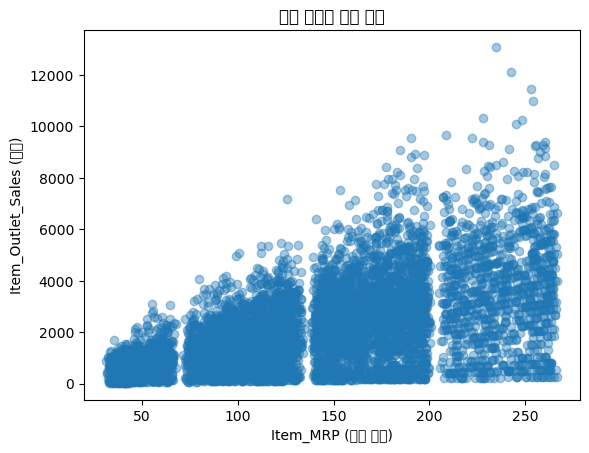

In [3]:
# =========================
# 2) EDA
# =========================
print("\n★ 데이터 기본 정보")
display(train.info())

print("\n★ 결측치 개수")
display(train.isnull().sum())

print("\n★ 통계 요약")
display(train.describe())

# 가격 - 매출 관계 시각화
plt.scatter(train['Item_MRP'], train['Item_Outlet_Sales'], alpha=0.4)
plt.xlabel("Item_MRP (상품 가격)")
plt.ylabel("Item_Outlet_Sales (매출)")
plt.title("상품 가격과 매출 관계")
plt.show()

In [4]:
# =========================
# 3) 데이터 전처리
# =========================

# (1) 결측치 처리
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace=True)

train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

# (2) 범주형 통일
train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}, inplace=True)
test['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}, inplace=True)

# (3) Label Encoding
cat_cols = train.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    if col != 'Item_Identifier':
        train[col] = le.fit_transform(train[col])
        test[col] = le.transform(test[col])

print("\n★ 전처리 완료\n")



★ 전처리 완료



/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


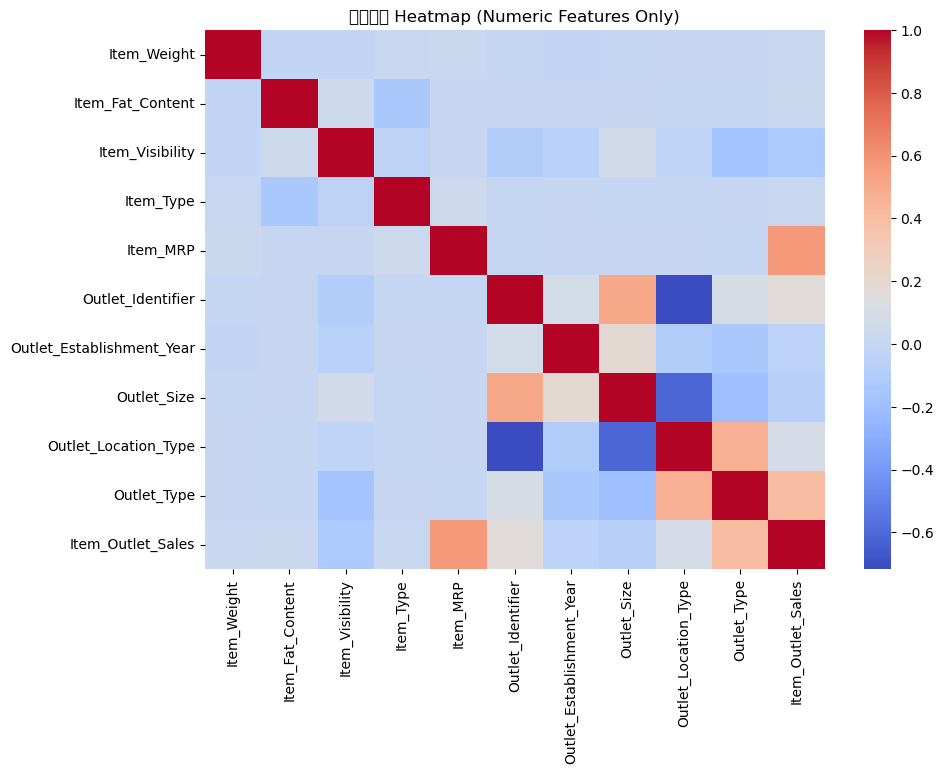


★ 특징과 매출 상관계수 Top 5
Item_Outlet_Sales       1.000000
Item_MRP                0.566721
Outlet_Type             0.403406
Outlet_Identifier       0.168264
Outlet_Location_Type    0.081918
Name: Item_Outlet_Sales, dtype: float64


In [5]:
# =========================
# 4) 상관계수 분석
# =========================

# 숫자형 컬럼만 선택
numeric_cols = train.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,7))
sns.heatmap(numeric_cols.corr(), cmap='coolwarm', annot=False)
plt.title("상관계수 Heatmap (Numeric Features Only)")
plt.show()

print("\n★ 특징과 매출 상관계수 Top 5")
print(numeric_cols.corr()['Item_Outlet_Sales'].sort_values(ascending=False).head())


In [6]:
# =========================
# 5) 학습용 데이터 분리 (8:2)
# =========================
X = train.drop(['Item_Outlet_Sales','Item_Identifier'], axis=1)
y = train['Item_Outlet_Sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n★ 데이터 분리 완료 (Train 80% / Val 20%)")



★ 데이터 분리 완료 (Train 80% / Val 20%)


In [7]:
# =========================
# 6) 모델 학습 + 교차검증
# =========================
model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

print("\n★ K-Fold 교차검증 결과 (R2 Score):")
print(cv_scores)
print("평균 R2:", cv_scores.mean())

# 최종 학습
model.fit(X_train, y_train)


★ K-Fold 교차검증 결과 (R2 Score):
[0.52932281 0.49645928 0.46269249 0.52290615 0.51232935]
평균 R2: 0.5047420190052698


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
# =========================
# 7) 검증 데이터 평가
# =========================
preds = model.predict(X_val)

mse = mean_squared_error(y_val, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, preds)

print("\n★ 검증 성능")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


★ 검증 성능
MSE: 1430490.3471932195
RMSE: 1196.0310811986533
R2 Score: 0.5210070191366059
